# CÀI THƯ VIỆN, ĐỌC DỮ LIỆU TỪ DRIVE

Cài đặt thư viện 

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.wrappers.scikit_learn import KerasRegressor
import os.path
from os import path
from pylab import rcParams
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.tsatools import freq_to_period
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
import pickle
import os
import joblib

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Kết nối drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Đọc dữ liệu từ drive

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/public_dataset/BTC-USD.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2795,2022-05-13,29030.910156,30924.802734,28782.330078,29283.103516,29283.103516,42841124537
2796,2022-05-14,29285.642578,30192.802734,28702.910156,30101.265625,30101.265625,28579868620
2797,2022-05-15,30098.585938,31308.191406,29527.740234,31305.113281,31305.113281,25835372065
2798,2022-05-16,31304.375000,31305.341797,29251.884766,29862.917969,29862.917969,32613897286


# XỬ LÝ BỘ DỮ LIỆU


In [ ]:
data.Date = pd.to_datetime(data.Date, dayfirst = False) # đổi định dạng sang ngày cột Date 
data.set_index("Date", inplace = True) # chuyển cột đếm -> cột ngày tháng

In [ ]:
data = data[['Close']] # Chỉ lưu lại cột "Close" 

In [ ]:
data

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2022-05-13,29283.103516
2022-05-14,30101.265625
2022-05-15,31305.113281


# KHẢO SÁT BỘ DỮ LIỆU


In [ ]:
data.describe()

,Close
count,2800.000000
mean,12207.621463
std,16626.167656
min,178.102997
25%,617.028733
50%,6476.500000
75%,11184.254883
max,67566.828125


In [ ]:
data.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-05-08', '2022-05-09', '2022-05-10', '2022-05-11',
               '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-15',
               '2022-05-16', '2022-05-17'],
              dtype='datetime64[ns]', name='Date', length=2800, freq=None)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2800 entries, 2014-09-17 to 2022-05-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2800 non-null   float64
dtypes: float64(1)
memory usage: 43.8 KB


In [ ]:
data.count() 

Close    2800
dtype: int64

Hiển thị giá cột "Close" từ dữ liệu 

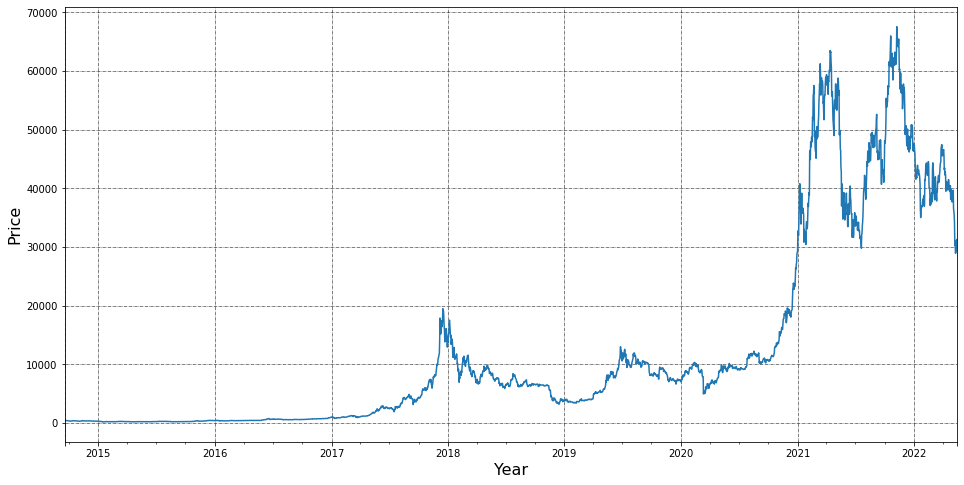

In [ ]:
import matplotlib.ticker as ticker

data['Close'].plot(figsize=(16, 8))

plt.ylabel('Price', fontsize=16)
plt.xlabel('Year', fontsize=16)

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

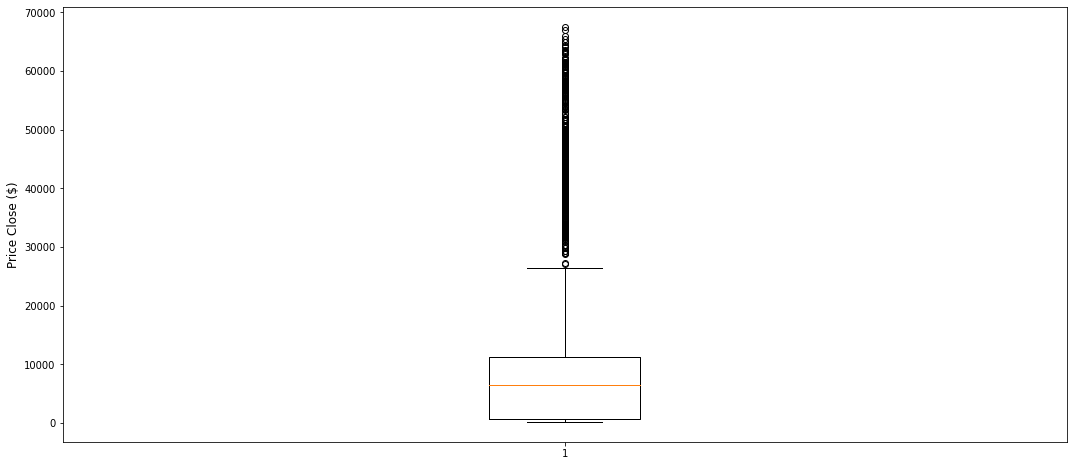

In [ ]:
plt.figure(figsize=(18, 8))
plt.boxplot(data["Close"])
plt.ylabel("Price Close ($)", fontsize=12)
plt.show()

Phân tích dữ liệu time series bằng model 'additive'

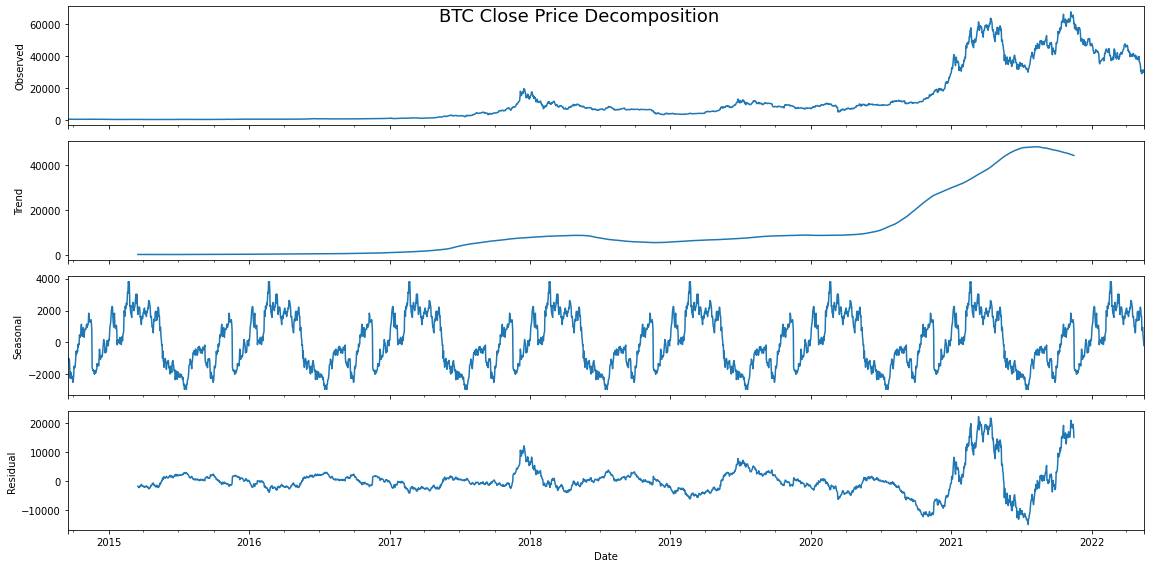

In [ ]:
rcParams['figure.figsize'] = 16,8
decomposition = seasonal_decompose(data['Close'], model = 'additive',freq = 365 )
fig = decomposition.plot()
fig.suptitle('BTC Close Price Decomposition', fontsize=18)
plt.show()

# MÔ HÌNH HỌC MÁY 

## Chia dữ liệu Train - Test

Chia dữ liệu thành 2 tập train_test với tỉ lệ lần lượt là 80% và 20% 

size_train: số lượng phần tử tập train, chiếm 80% số lượng của bộ dữ liệu

train_data: dữ liệu tập train, chiếm 80% dữ liệu liên tiếp tính từ ngày đầu tiên của bộ dữ liệu 

test_data: dữ liệu tập test, chiếm 20% còn lại của bộ dữ liệu 

In [ ]:
size_train = int(len(data)*0.80) 
train_data = data[0:size_train] 
test_data = data[size_train:]

Trực quan tập train-test bằng đồ thị

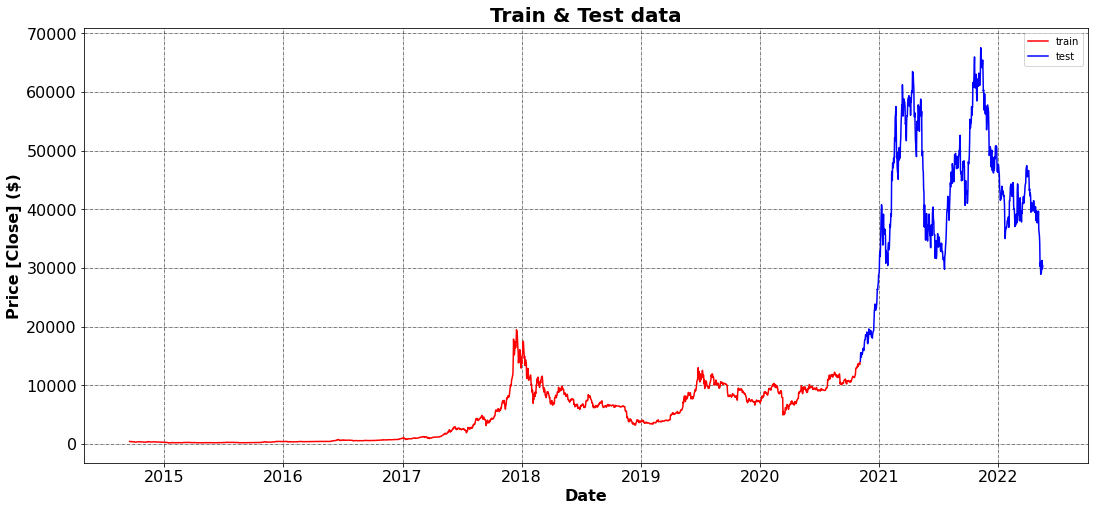

In [ ]:
fig, ax = plt.subplots(figsize=(18,8)) # 4.5, 2
sns.lineplot(x = data.index[:size_train], y = data['Close'][:size_train], color = 'red')
sns.lineplot(x = data.index[size_train:], y = data['Close'][size_train:], color = 'blue')

ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price [Close] ($)', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [ ]:
pd_train = pd.DataFrame(train_data) 
pd_test = pd.DataFrame(test_data)
print("Tập train:")
print(pd_train.describe())
print("") 
print("Tập test:")
print(pd_test.describe())

Tập train:
              Close
count   2240.000000
mean    4553.751680
std     4226.764450
min      178.102997
25%      437.563743
50%     3735.634399
75%     8184.080201
max    19497.400391

Tập test:
              Close
count    560.000000
mean   42823.100595
std    11782.905091
min    14133.707031
25%    36062.583985
50%    42726.224610
75%    50448.593750
max    67566.828125


Khởi tạo X_train, y_train, X_test, y_test 

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step)]
        dataX.append(a)
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)

time_step = 30
X_train, y_train = create_dataset(train_data['Close'], time_step)
X_test, y_test = create_dataset(test_data['Close'], time_step)

Khởi tạo thêm 1 biết sao chép để lưu trữ giá trị gốc, tiện cho việc so sánh ở phần đánh giá mô hình là:

X_train_copy, y_train_copy, X_test_copy, y_test_copy

In [ ]:
X_train_copy = X_train
y_train_copy = y_train
X_test_copy = X_test
y_test_copy = y_test

Đưa dữ liệu X_train, y_train, X_test, y_test về giá trị từ 0 -> 1 bằng hàm MinMaxScaler 

In [ ]:
scaler_test = MinMaxScaler(feature_range=(0,1))
scaler_train = MinMaxScaler(feature_range=(0,1))

X_train = scaler_train.fit_transform(X_train)
X_test  = scaler_test.fit_transform(X_test)
y_train = scaler_train.fit_transform(y_train.reshape(-1,1))
y_test = scaler_test.fit_transform(y_test.reshape(-1,1))

## Mô hình Random Forest
---

Khởi tạo mô hình Random Forest

In [ ]:
model_RDFR = RandomForestRegressor()

model_RDFR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

## Mô hình Long short term memory
---

Khởi tạo mô hình Long short term memory 

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(30, return_sequences = True, input_shape = (X_train.shape[1],1)))
model_LSTM.add(LSTM(30, return_sequences =False))
model_LSTM.add(Dense(25))
model_LSTM.add(Dense(1))
model_LSTM.compile(optimizer = 'adam', loss = 'mean_squared_error')

model_LSTM.fit(X_train,y_train, epochs= 5, batch_size= 2)

Epoch 1/5
1105/1105 [==============================] - 60s 37ms/step - loss: 0.0022
Epoch 2/5
1105/1105 [==============================] - 26s 23ms/step - loss: 9.8520e-04
Epoch 3/5
1105/1105 [==============================] - 26s 23ms/step - loss: 6.3934e-04
Epoch 4/5
1105/1105 [==============================] - 26s 24ms/step - loss: 6.0073e-04
Epoch 5/5
1105/1105 [==============================] - 25s 23ms/step - loss: 4.9338e-04


## Mô hình XGBoost 
---

Khởi tạo mô hình XGBoost

In [ ]:
model_XGBM = XGBRegressor()

model_XGBM.fit(X_train, y_train, verbose=False)

[12:10:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

# TINH CHỈNH MÔ HÌNH

## Mô hình Random Forest

Tìm các siêu tham số bằng hàm GridSearchCV, trong mô hình Random Forest nhóm sử dụng các tham số:

n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf

Thời gian chạy: 10022s ~ 167p 

In [ ]:
n_estimators = list(range(100, 500, 100))
max_features = ['auto', 'sqrt', 'log2']
max_depth = list(range(10, 50, 10))
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5, 10]

grid_RDFR = { 'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

RDFR = RandomForestRegressor()

model_RDFR_update = GridSearchCV(estimator = RDFR, param_grid = grid_RDFR)

model_RDFR_update.fit(X_train, y_train)

Tham số tốt nhất mà nhóm tìm được của mô hình Random Forest, nhóm lưu lại để thêm vào mô hình, vì không tinh chỉnh được cả 3 mô hình trong 1 lần chạy.

In [ ]:
print(model_RDFR_update.best_params_) 

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 400}


## Mô hình Long short term memory

Tìm siêu tham số bằng hàm GridSearchCV, trong mô hình Long short term memory nhóm sử dụng các tham số:

epochs, batch_size, hidden_layers, neurons,

Thời gian chạy: 6892s ~ 115p

Vì giới hạn tài nguyên nhóm đã không thử các giá trị epochs khác như dự định là 5,10,15,20... mà chỉ thử 1 giá trị epochs = 1.  

In [ ]:
def create_model(neurons =50, hidden_layers=1):
    model_LSTM_update = Sequential()
    model_LSTM_update.add(LSTM(neurons, return_sequences = True, input_shape = (X_train.shape[1],1)))
    for i in range(hidden_layers):
        model_LSTM_update.add(LSTM(neurons))
    model_LSTM_update.add(Dense(25))
    model_LSTM_update.add(Dense(1))
    model_LSTM_update.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model_LSTM_update

model_LSTM_update = KerasRegressor(build_fn=create_model, verbose=0)
epochs = list(range(1,2,1))
batch_size = list(range(1, 5, 1))
hidden_layers = [1, 2]
neurons = list(range(100,401,100))

grid_LSTM = dict( neurons=neurons,
                  epochs=epochs, 
                  batch_size=batch_size, 
                  hidden_layers = hidden_layers)

model_LSTM_update = GridSearchCV(estimator = model_LSTM_update, param_grid= grid_LSTM)

model_LSTM_update.fit(X_train, y_train)

Tham số tốt nhất mà nhóm tìm được của mô hình Long short term memory, nhóm lưu lại để thêm vào mô hình, vì không tinh chỉnh được cả 3 mô hình trong 1 lần chạy.

In [ ]:
print(model_LSTM_update.best_params_) 

{'batch_size': 1, 'epochs': 1, 'hidden_layers': 1, 'neurons': 400}


## Mô hình XGBoost

Tìm các siêu tham số bằng hàm GridSearchCV, trong mô hình XGBoost nhóm sử dụng các tham số:

n_estimators, max_depth, learning_rate, colsample_bytree, subsample 

Thời gian chạy: 9859s ~ 165p 

In [ ]:
n_estimators = list(range(100, 1000, 200))
max_depth = list(range(3, 10, 2))
max_depth.append(None)
learning_rate = [0.01, 0.05, 0.1,0.15, 0.2]
colsample_bytree = [0.5, 0.6, 0.8, 1]
subsample = [0.6, 0.8, 1]
# Khởi tạo
grid_XGBM = {  'n_estimators': n_estimators,
              'max_depth': max_depth,
              'learning_rate': learning_rate,
              'colsample_bytree': colsample_bytree,
              'subsample': subsample}


XGBM = XGBRegressor()

model_XGBM_update = GridSearchCV(estimator = XGBM, param_grid= grid_XGBM)

model_XGBM_update.fit(X_train, y_train)

Tham số tốt nhất mà nhóm tìm được của mô hình XGBoost, nhóm lưu lại để thêm vào mô hình, vì không tinh chỉnh được cả 3 mô hình trong 1 lần chạy.

In [ ]:
# Tham số tốt nhất mà nhóm tìm được
print(model_XGBM_update.best_params_) 

{'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 700, 'subsample': 0.6}


# MÔ HÌNH SAU KHI TINH CHỈNH  

Bộ siêu tham số tốt nhất nhóm tìm được từ GridSearchCV thay vào mô hình học máy 

model_RDFR_update là mô hình Random Forest sau khi áp dụng các siêu tham số nhóm tìm được 

model_LSTM_update là mô hình Long short term memory sau khi áp dụng các siêu tham số nhóm tìm được 

model_XGBM_update là mô hình XGBoost sau khi áp dụng các siêu tham số nhóm tìm được 

In [ ]:
# Mô hình Random Forest sau khi tinh chỉnh 
model_RDFR_update = RandomForestRegressor(n_estimators=400, max_depth= None, max_features='auto', min_samples_leaf=10, min_samples_split=5)
model_RDFR_update.fit(X_train, y_train)

# Mô hình XGBoost sau khi tinh chỉnh 
model_XGBM_update = XGBRegressor(colsample_bytree= 1, learning_rate=0.2, max_depth=7, n_estimators=700,subsample=0.6)
model_XGBM_update.fit(X_train, y_train)  

# Mô hình LSTM sau khi tinh chỉnh 
model_LSTM_update = Sequential() 
model_LSTM_update.add(LSTM(400, return_sequences = True, input_shape = (X_train.shape[1],1)))
model_LSTM_update.add(LSTM(400, return_sequences =False))
model_LSTM_update.add(Dense(25))
model_LSTM_update.add(Dense(1))
model_LSTM_update.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_LSTM_update.fit(X_train,y_train, epochs= 1, batch_size= 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[12:11:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2209/2209 [==============================] - 341s 153ms/step - loss: 0.0016


# ĐÁNH GIÁ MÔ HÌNH 

## Mô hình học máy ban đầu

y_pred_test_RDFR, y_pred_test_LSTM, y_pred_test_XGBM lần lượt là các dự đoán từ các mô hình học máy là Random Forest, Long short term memory, XGBoost với đầu vào là X_test. 

In [ ]:
y_pred_test_RDFR = model_RDFR.predict(X_test)
y_pred_test_LSTM = model_LSTM.predict(X_test)
y_pred_test_XGBM = model_XGBM.predict(X_test)

Chuẩn hóa y_pred_test_RDFR, y_pred_test_LSTM, y_pred_test_XGBM về lại giá trị ban đầu 

In [ ]:
y_pred_test_RDFR = scaler_test.inverse_transform(y_pred_test_RDFR.reshape(-1,1))
y_pred_test_XGBM = scaler_test.inverse_transform(y_pred_test_XGBM.reshape(-1,1))
y_pred_test_LSTM = scaler_test.inverse_transform(y_pred_test_LSTM.reshape(-1,1))

Biểu diễn ba đường dự đoán từ ba mô hình và đường y_test_copy ( Vì y_test_copy là y_test ở giá trị ban đầu)

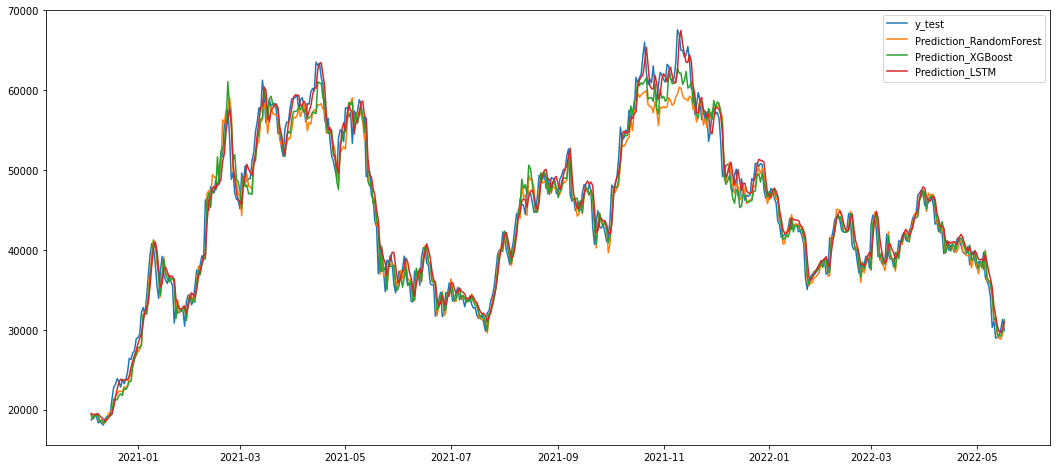

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(data.index[2271:],y_test_copy, label = 'y_test')
plt.plot(data.index[2271:],y_pred_test_RDFR, label = 'Prediction_RandomForest')
plt.plot(data.index[2271:],y_pred_test_XGBM, label = 'Prediction_XGBoost')
plt.plot(data.index[2271:],y_pred_test_LSTM, label = 'Prediction_LSTM')
plt.legend()

y_pred_train_RDFR, y_pred_train_LSTM, y_pred_train_XGBM lần lượt là các dự đoán từ các mô hình học máy là Random Forest, Long short term memory, XGBoost với đầu vào là X_train. 

In [ ]:
y_pred_train_RDFR = model_RDFR.predict(X_train)
y_pred_train_LSTM = model_LSTM.predict(X_train) 
y_pred_train_XGBM = model_XGBM.predict(X_train)  

Chuẩn hóa y_pred_train_RDFR, y_pred_train_LSTM, y_pred_train_XGBM về lại giá trị ban đầu 

In [ ]:
y_pred_train_RDFR = scaler_train.inverse_transform(y_pred_train_RDFR.reshape(-1,1))
y_pred_train_XGBM = scaler_train.inverse_transform(y_pred_train_XGBM.reshape(-1,1))
y_pred_train_LSTM = scaler_train.inverse_transform(y_pred_train_LSTM.reshape(-1,1))

Biểu diễn ba đường dự đoán từ ba mô hình và đường y_train_copy (Vì y_train_copy là y_train ở giá trị ban đầu)

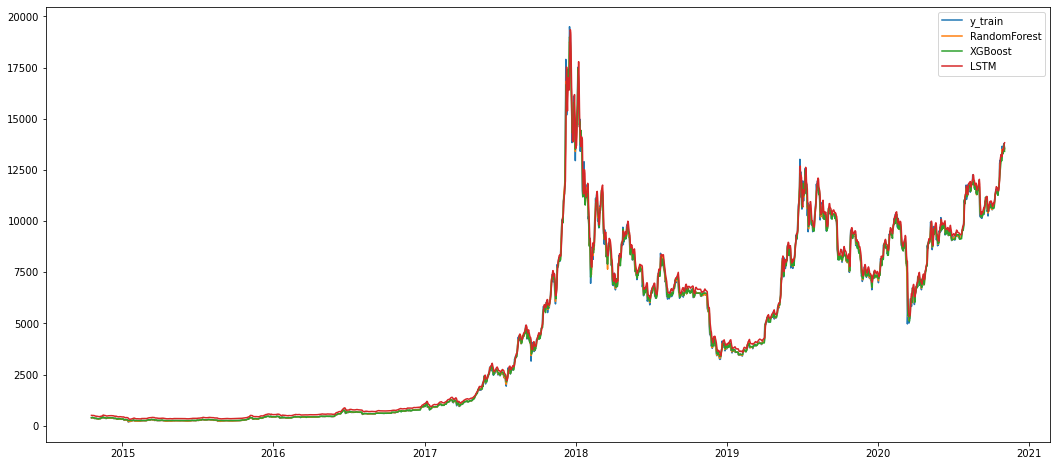

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(data.index[31:2240],y_train_copy, label = 'y_train')
plt.plot(data.index[31:2240],y_pred_train_RDFR, label = 'RandomForest')
plt.plot(data.index[31:2240],y_pred_train_XGBM, label = 'XGBoost')
plt.plot(data.index[31:2240],y_pred_train_LSTM, label = 'LSTM')
plt.tick_params(axis='y', which='major', labelsize=10)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.legend()

In [ ]:
# Đánh giá độ chính xác của 3 mô hình học máy qua 4 giá trị MSE, MAE, MAPE, R2 trên tập train-test
print("TẬP TEST                           TẬP TRAIN")
print("Random Forest")
print("MSE  : " + str(mean_squared_error(y_test_copy, y_pred_test_RDFR))                
+"  ||  "  + str(mean_squared_error(y_train_copy, y_pred_train_RDFR)))
print("MAE  : " + str(mean_absolute_error(y_test_copy, y_pred_test_RDFR))               
+" ||  " + str(mean_absolute_error(y_train_copy, y_pred_train_RDFR)))
print("MAPE : " + str(mean_absolute_percentage_error(y_test_copy, y_pred_test_RDFR)*100)
+"  ||  "  + str(mean_absolute_percentage_error(y_train_copy, y_pred_train_RDFR)*100))
print("R2   : " + str(round(metrics.r2_score(y_test_copy, y_pred_test_RDFR), 15))
+"  ||  "  + str(round(metrics.r2_score(y_train_copy, y_pred_train_RDFR), 15)))

print("")
print("LSTM")
print("MSE  : " + str(mean_squared_error(y_test_copy, y_pred_test_LSTM))                
+"  ||  "  + str(mean_squared_error(y_train_copy, y_pred_train_LSTM)))
print("MAE  : " + str(mean_absolute_error(y_test_copy, y_pred_test_LSTM))               
+"  ||  " + str(mean_absolute_error(y_train_copy, y_pred_train_LSTM)))
print("MAPE : " + str(mean_absolute_percentage_error(y_test_copy, y_pred_test_LSTM)*100)
+" ||  "  + str(mean_absolute_percentage_error(y_train_copy, y_pred_train_LSTM)*100))
print("R2   : " + str(round(metrics.r2_score(y_test_copy, y_pred_test_LSTM), 15))
+"  ||  "  + str(round(metrics.r2_score(y_train_copy, y_pred_train_LSTM), 15)))

print("")
print("XGBoost")
print("MSE  : " + str(mean_squared_error(y_test_copy, y_pred_test_XGBM))
+"  ||  " + str(mean_squared_error(y_train_copy, y_pred_train_XGBM)))
print("MAE  : " + str(mean_absolute_error(y_test_copy, y_pred_test_XGBM))
+"  ||  " + str(mean_absolute_error(y_train_copy, y_pred_train_XGBM)))
print("MAPE : " + str(mean_absolute_percentage_error(y_test_copy, y_pred_test_XGBM)*100)
+"  ||  " + str(mean_absolute_percentage_error(y_train_copy, y_pred_train_XGBM)*100))
print("R2   : " + str(round(metrics.r2_score(y_test_copy, y_pred_test_XGBM), 15))
+"  ||  "  + str(round(metrics.r2_score(y_train_copy, y_pred_train_XGBM), 15)))

TẬP TEST                           TẬP TRAIN
Random Forest
MSE  : 4864437.632957163  ||  14734.268424612428
MAE  : 1650.3319300560981 ||  53.331737882412895
MAPE : 3.656803256110804  ||  1.0066159775174686
R2   : 0.954466491078274  ||  0.999173593576579

LSTM
MSE  : 3568017.302220078  ||  117962.13856210625
MAE  : 1434.059904435964  ||  214.117144915097
MAPE : 3.3721536920395625 ||  14.468228984120552
R2   : 0.966601617715726  ||  0.993383813419242

XGBoost
MSE  : 3983224.944503315  ||  34927.75728008159
MAE  : 1504.982137599244  ||  100.07830821807715
MAPE : 3.435009073010679  ||  3.072708879351898
R2   : 0.962715071662348  ||  0.998040993815225


## Mô hình sau khi nhóm tối ưu 

In [ ]:
y_pred_test_RDFR_update = model_RDFR_update.predict(X_test)
y_pred_test_LSTM_update = model_LSTM_update.predict(X_test)
y_pred_test_XGBM_update = model_XGBM_update.predict(X_test)

In [ ]:
y_pred_test_RDFR_update = scaler_test.inverse_transform(y_pred_test_RDFR_update.reshape(-1,1))
y_pred_test_XGBM_update = scaler_test.inverse_transform(y_pred_test_XGBM_update.reshape(-1,1))
y_pred_test_LSTM_update = scaler_test.inverse_transform(y_pred_test_LSTM_update.reshape(-1,1))

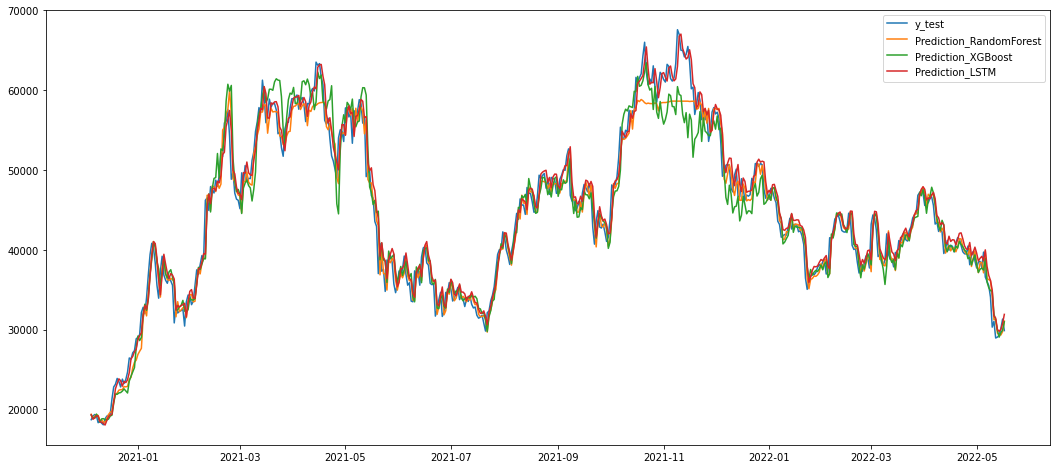

In [ ]:
# Trực quan hóa các giá trị dự đoán so với y_test bằng biểu đồ đường
plt.figure(figsize=(18,8))
plt.plot(data.index[2271:],y_test_copy, label = 'y_test')
plt.plot(data.index[2271:],y_pred_test_RDFR_update, label = 'Prediction_RandomForest')
plt.plot(data.index[2271:],y_pred_test_XGBM_update, label = 'Prediction_XGBoost')
plt.plot(data.index[2271:],y_pred_test_LSTM_update, label = 'Prediction_LSTM')
plt.tick_params(axis='y', which='major', labelsize=10)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.legend()

In [ ]:
y_pred_train_RDFR_update = model_RDFR_update.predict(X_train)
y_pred_train_LSTM_update = model_LSTM_update.predict(X_train) 
y_pred_train_XGBM_update = model_XGBM_update.predict(X_train) 

In [ ]:
y_pred_train_RDFR_update = scaler_train.inverse_transform(y_pred_train_RDFR_update.reshape(-1,1))
y_pred_train_XGBM_update = scaler_train.inverse_transform(y_pred_train_XGBM_update.reshape(-1,1))
y_pred_train_LSTM_update = scaler_train.inverse_transform(y_pred_train_LSTM_update.reshape(-1,1))

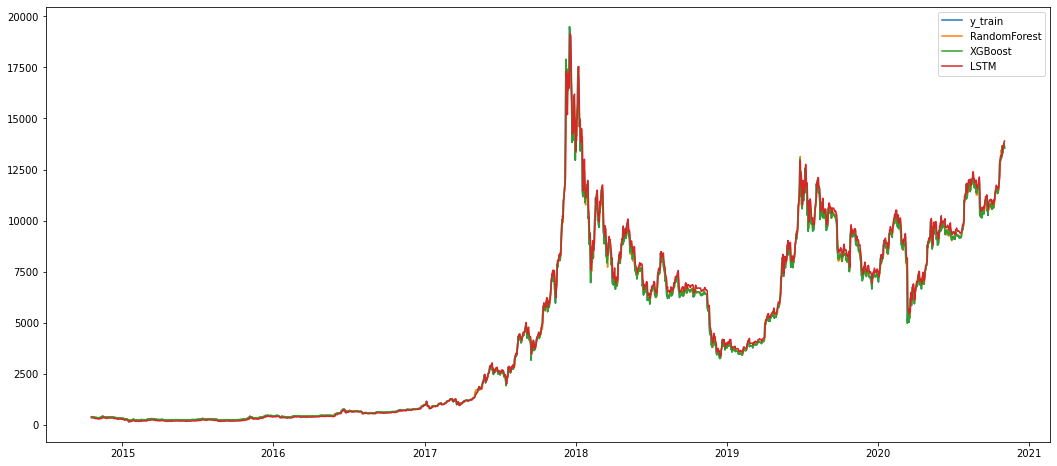

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(data.index[31:2240],y_train_copy, label = 'y_train')
plt.plot(data.index[31:2240],y_pred_train_RDFR_update, label = 'RandomForest')
plt.plot(data.index[31:2240],y_pred_train_XGBM_update, label = 'XGBoost')
plt.plot(data.index[31:2240],y_pred_train_LSTM_update, label = 'LSTM')
plt.tick_params(axis='y', which='major', labelsize=10)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.legend()

In [ ]:
# Đánh giá độ chính xác của 3 mô hình học máy qua 4 giá trị MSE, MAE, MAPE, R2 trên tập train-test
print("TẬP TEST                           TẬP TRAIN")
print("Random Forest")
print("MSE  : " + str(mean_squared_error(y_test_copy, y_pred_test_RDFR_update))                
+"  ||  "  + str(mean_squared_error(y_train_copy, y_pred_train_RDFR_update)))
print("MAE  : " + str(mean_absolute_error(y_test_copy, y_pred_test_RDFR_update))               
+" ||  " + str(mean_absolute_error(y_train_copy, y_pred_train_RDFR_update)))
print("MAPE : " + str(mean_absolute_percentage_error(y_test_copy, y_pred_test_RDFR_update)*100)
+"  ||  "  + str(mean_absolute_percentage_error(y_train_copy, y_pred_train_RDFR_update)*100))
print("R2   : " + str(round(metrics.r2_score(y_test_copy, y_pred_test_RDFR_update), 15))
+"  ||  "  + str(round(metrics.r2_score(y_train_copy, y_pred_train_RDFR_update), 15)))

print("")
print("LSTM")
print("MSE  : " + str(mean_squared_error(y_test_copy, y_pred_test_LSTM_update))                
+"   ||  "  + str(mean_squared_error(y_train_copy, y_pred_train_LSTM_update)))
print("MAE  : " + str(mean_absolute_error(y_test_copy, y_pred_test_LSTM_update))               
+" ||  " + str(mean_absolute_error(y_train_copy, y_pred_train_LSTM_update)))
print("MAPE : " + str(mean_absolute_percentage_error(y_test_copy, y_pred_test_LSTM_update)*100)
+" ||  "  + str(mean_absolute_percentage_error(y_train_copy, y_pred_train_LSTM_update)*100))
print("R2   : " + str(round(metrics.r2_score(y_test_copy, y_pred_test_LSTM_update), 15))
+"  ||  "  + str(round(metrics.r2_score(y_train_copy, y_pred_train_LSTM_update), 15)))

print("")
print("XGBoost")
print("MSE  : " + str(mean_squared_error(y_test_copy, y_pred_test_XGBM_update))
+"  ||  " + str(mean_squared_error(y_train_copy, y_pred_train_XGBM_update)))
print("MAE  : " + str(mean_absolute_error(y_test_copy, y_pred_test_XGBM_update))
+"  ||  " + str(mean_absolute_error(y_train_copy, y_pred_train_XGBM_update)))
print("MAPE : " + str(mean_absolute_percentage_error(y_test_copy, y_pred_test_XGBM_update)*100)
+" ||  " + str(mean_absolute_percentage_error(y_train_copy, y_pred_train_XGBM_update)*100))
print("R2   : " + str(round(metrics.r2_score(y_test_copy, y_pred_test_XGBM_update), 15))
+"  ||  "  + str(round(metrics.r2_score(y_train_copy, y_pred_train_XGBM_update), 15)))

TẬP TEST                           TẬP TRAIN
Random Forest
MSE  : 4562208.790964032  ||  63853.457470451314
MAE  : 1550.2687815832069 ||  110.82143681573318
MAPE : 3.465027732891906  ||  2.1105108288281094
R2   : 0.957295500454416  ||  0.996418627251077

LSTM
MSE  : 3359315.0206512036   ||  107290.1998610124
MAE  : 1372.0329151198018 ||  186.1372005453341
MAPE : 3.209768186292154 ||  7.924621903077974
R2   : 0.968555172867799  ||  0.993982374436238

XGBoost
MSE  : 6345492.741674653  ||  74.11762553033977
MAE  : 1805.384226597117  ||  6.429887311419109
MAPE : 3.9868527692376023 ||  0.6379346409472502
R2   : 0.940603092861498  ||  0.999995842937018


# PHÂN TÍCH LỖI 

## Kiểm tra vùng có lỗi dự đoán lớn

CHia tập test thành 10 khoảng thời gian, 9 khoảng thời gian mỗi khoảng thời gian là 53 ngày liên tiếp nhau, khoảng thời gian cuối cùng là 52 ngày, các khoảng thời gian nối tiếp nhau.

Lý do vì nhóm dùng time_step = 30, nên tập test lúc đầu 560 dòng, sẽ bỏ 30 dòng đầu, vậy nên y_test sẽ chỉ còn 529 dòng (mất thêm 1 dòng ở dự đoán cuối cùng vượt quá tập dữ liệu)  

Nhóm chỉ dùng đại diện chỉ số R2 để nhận xét trên từng khoảng dữ liệu 

In [ ]:
for numbers in range(53,531,53):
  print("Từ ngày " + str(data.index[2270 + numbers -53 - 1 ]) + " đến ngày " + str(data.index[2270 + numbers -1 ]))
  print("TẬP TEST                        ")
  print("Random Forest: R2 = ", round(metrics.r2_score(y_test_copy[numbers-53:numbers], y_pred_test_RDFR_update[numbers-53:numbers]), 10))
  #print("MSE  : " + str(mean_squared_error(y_test_copy[numbers-53:numbers], y_pred_test_RDFR_update[numbers-53:numbers])))                
  #print("MAE  : " + str(mean_absolute_error(y_test_copy[numbers-53:numbers], y_pred_test_RDFR_update[numbers-53:numbers])))               
  #print("MAPE : " + str(mean_absolute_percentage_error(y_test_copy[numbers-53:numbers], y_pred_test_RDFR_update[numbers-53:numbers])*100))
  #print("")
  print("LSTM:          R2 = ", round(metrics.r2_score(y_test_copy[numbers-53:numbers], y_pred_test_LSTM_update[numbers-53:numbers]), 10))
  #print("MSE  : " + str(mean_squared_error(y_test_copy[numbers-53:numbers], y_pred_test_LSTM_update[numbers-53:numbers])))                
  #print("MAE  : " + str(mean_absolute_error(y_test_copy[numbers-53:numbers], y_pred_test_LSTM_update[numbers-53:numbers])))               
  #print("MAPE : " + str(mean_absolute_percentage_error(y_test_copy[numbers-53:numbers], y_pred_test_LSTM_update[numbers-53:numbers])*100))
  #print("")
  print("XGBoost:       R2 = ", round(metrics.r2_score(y_test_copy[numbers-53:numbers], y_pred_test_XGBM_update[numbers-53:numbers]), 10))
  #print("MSE  : " + str(mean_squared_error(y_test_copy[numbers-53:numbers], y_pred_test_XGBM_update[numbers-53:numbers])))
  #print("MAE  : " + str(mean_absolute_error(y_test_copy[numbers-53:numbers], y_pred_test_XGBM_update[numbers-53:numbers])))
  #print("MAPE : " + str(mean_absolute_percentage_error(y_test_copy[numbers-53:numbers], y_pred_test_XGBM_update[numbers-53:numbers])*100))

  print("===========================================================")


Từ ngày 2020-12-03 00:00:00 đến ngày 2021-01-25 00:00:00
TẬP TEST                        
Random Forest: R2 =  0.9399859527
LSTM:          R2 =  0.9517319778
XGBoost:       R2 =  0.9432844821
Từ ngày 2021-01-25 00:00:00 đến ngày 2021-03-19 00:00:00
TẬP TEST                        
Random Forest: R2 =  0.9137169013
LSTM:          R2 =  0.9346269188
XGBoost:       R2 =  0.8783038418
Từ ngày 2021-03-19 00:00:00 đến ngày 2021-05-11 00:00:00
TẬP TEST                        
Random Forest: R2 =  0.4536964398
LSTM:          R2 =  0.642768152
XGBoost:       R2 =  -0.1832730472
Từ ngày 2021-05-11 00:00:00 đến ngày 2021-07-03 00:00:00
TẬP TEST                        
Random Forest: R2 =  0.7406645963
LSTM:          R2 =  0.6789734897
XGBoost:       R2 =  0.6350600968
Từ ngày 2021-07-03 00:00:00 đến ngày 2021-08-25 00:00:00
TẬP TEST                        
Random Forest: R2 =  0.9553329152
LSTM:          R2 =  0.9577495158
XGBoost:       R2 =  0.9550005175
Từ ngày 2021-08-25 00:00:00 đến ngày 202

Hiển thị khoảng dữ liệu có mô hình học máy hoạt động kém

Nhóm tìm được các khoảng thời gian là: 

Từ ngày 19/03/2021 đến ngày 03/07/2021.

Từ ngày 17/10/2021 đến ngày 09/12/2021. 

Từ ngày 31/01/2022 đến ngày 25/03/2022. 

Đường màu đó là đường mà mô hình học máy hoạt động kém, được nhóm tìm thấy từ việc chia khoảng dữ liệu qua chỉ số R2

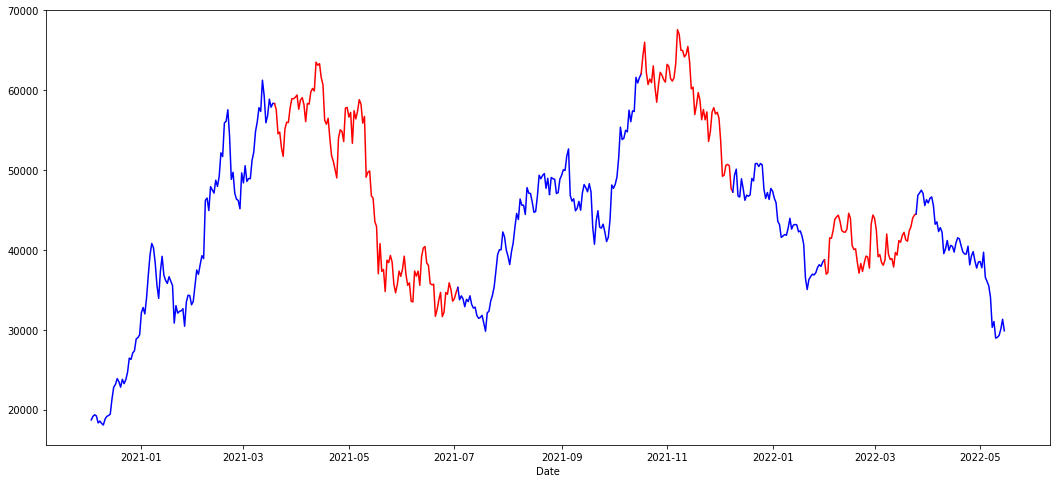

In [ ]:
fig, ax = plt.subplots(figsize=(18,8)) # 4.5, 2
for numbers in range(53,478,53):
  if numbers == 53*3 or numbers ==53*4 or numbers ==53*7 or numbers ==53*9:
    sns.lineplot(x = data.index[2270 + numbers -53 - 1:2270 + numbers], y = y_test_copy[numbers-53:numbers+1], color = 'red')
  else:
    sns.lineplot(x = data.index[2270 + numbers -53 - 1:2270 + numbers ], y = y_test_copy[numbers-53:numbers+1], color = 'blue')
sns.lineplot(x = data.index[2270 + 530 -53 - 1:2270 + 530 -1-1], y = y_test_copy[530-53:530-1], color = 'blue')    
plt.show()

# LÀM MỊN DỮ LIỆU

Nhóm sẽ không sử dụng dữ liệu sau khi làm mịn trong đồ án này. 

In [ ]:
days_out = 30

price_data_smoothed = data.transform(lambda x: x.ewm(span = days_out).mean())

data = pd.concat([price_data_smoothed], axis=0, sort=False)

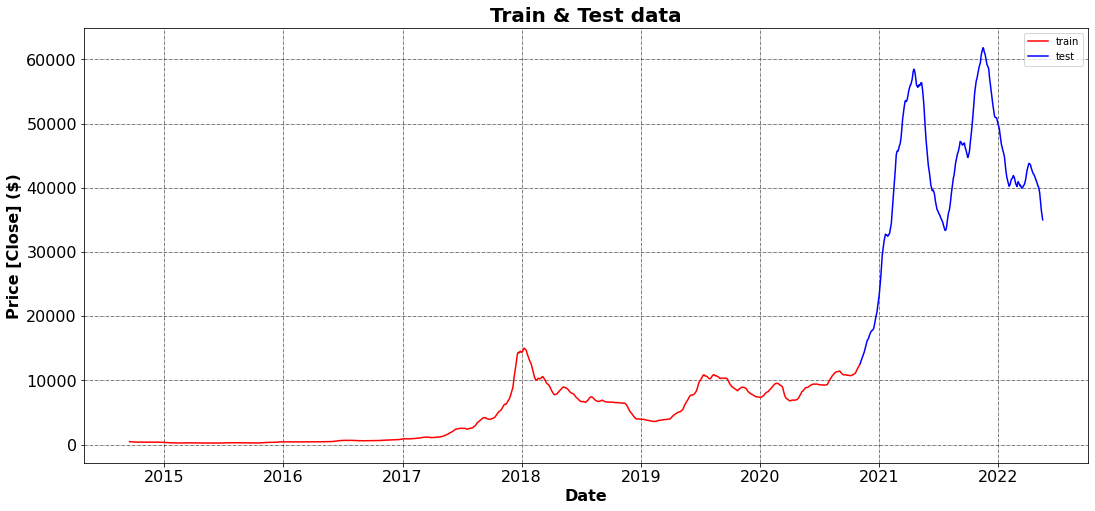

In [ ]:
fig, ax = plt.subplots(figsize=(18,8)) # 4.5, 2
sns.lineplot(x = data.index[:size_train], y = data['Close'][:size_train], color = 'red')
sns.lineplot(x = data.index[size_train:], y = data['Close'][size_train:], color = 'blue')

ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price [Close] ($)', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# DỰ ĐOÁN 30 NGÀY TIẾP THEO

Lấy ra phần tử cuối cùng của tập test, sử dụng để bắt đầu dự đoán trong tương lai

In [ ]:
Prediction_RDFR_30days = X_test[[len(X_test)-1]]

Prediction_XGBM_30days = X_test[[len(X_test)-1]]

Prediction_LSTM_30days = X_test[[len(X_test)-1]]

Mỗi vòng lặp sẽ dự đoán ra 1 ngày kế tiếp.

Sử dụng kết quả sau đó biến đổi để làm đầu vào và tiếp tục dự đoán ngày kế tiếp 

In [ ]:
i = 0
while i < 30:
  Prediction_RDFR_30days = np.append(Prediction_RDFR_30days, model_RDFR_update.predict(Prediction_RDFR_30days))
  Prediction_RDFR_30days = np.delete(Prediction_RDFR_30days, 0)
  Prediction_RDFR_30days = Prediction_RDFR_30days.reshape(1,30)

  Prediction_XGBM_30days = np.append(Prediction_XGBM_30days, model_XGBM_update.predict(Prediction_XGBM_30days))
  Prediction_XGBM_30days = np.delete(Prediction_XGBM_30days, 0)
  Prediction_XGBM_30days = Prediction_XGBM_30days.reshape(1,30)

  Prediction_LSTM_30days = np.append(Prediction_LSTM_30days, model_LSTM_update.predict(Prediction_LSTM_30days))
  Prediction_LSTM_30days = np.delete(Prediction_LSTM_30days, 0)
  Prediction_LSTM_30days = Prediction_LSTM_30days.reshape(1,30)
  i = i + 1

In [ ]:
Prediction_RDFR_30days = scaler_test.inverse_transform(Prediction_RDFR_30days)
Prediction_XGBM_30days = scaler_test.inverse_transform(Prediction_XGBM_30days)
Prediction_LSTM_30days = scaler_test.inverse_transform(Prediction_LSTM_30days)

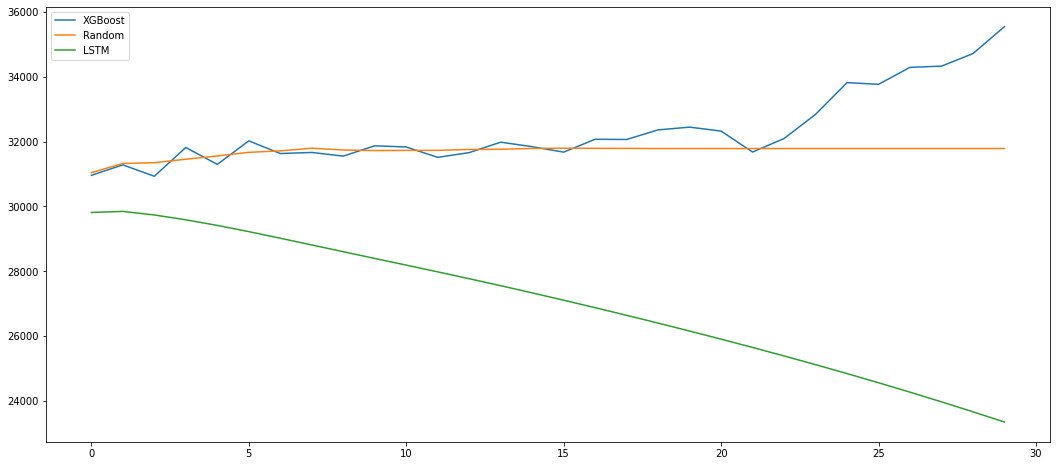

In [ ]:
plt.figure(figsize= (18, 8))
plt.plot(Prediction_XGBM_30days[0,:], label = 'XGBoost')
plt.plot(Prediction_RDFR_30days[0,:],label ="Random")
plt.plot(Prediction_LSTM_30days[0,:],label ="LSTM")
plt.legend()